In [ ]:
# pip install gym

In [1]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
env = gym.make('CartPole-v1', new_step_api=True)

STATE_DIM = 4
ACTION_DIM = 1

gamma = 0.99
lr = 0.001

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(STATE_DIM + ACTION_DIM, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, STATE_DIM)

    def forward(self, state, action):
        x = torch.cat([state, action], dim=-1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        next_state = self.fc3(x)
        return next_state


In [5]:
def collect_data(env, model, episodes=10000):
    data = []
    for _ in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action = np.random.choice(ACTION_DIM)
            next_state, reward, done, _, _ = env.step(action)
            data.append((state, action, next_state, reward))
            state = next_state
    return data

def train(model, data, optimizer, batch_size=32, epochs=100):
    model.train()
    for epoch in range(epochs):
        np.random.shuffle(data)
        for i in range(0, len(data), batch_size):
            batch = data[i:i+batch_size]
            states = torch.tensor([x[0] for x in batch], dtype=torch.float32)
            actions = torch.tensor([[x[1]] for x in batch], dtype=torch.float32)
            next_states = torch.tensor([x[2] for x in batch], dtype=torch.float32)

            predicted_next_state = model(states, actions)

            loss = torch.mean((predicted_next_state - next_states) ** 2)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0: print(f"Epoch {epoch+1} completed")

model = Model()
optimizer = optim.Adam(model.parameters(), lr=lr)

data = collect_data(env, model)
train(model, data, optimizer)

Epoch 10 completed
Epoch 20 completed
Epoch 30 completed
Epoch 40 completed
Epoch 50 completed
Epoch 60 completed
Epoch 70 completed
Epoch 80 completed
Epoch 90 completed
Epoch 100 completed


Left


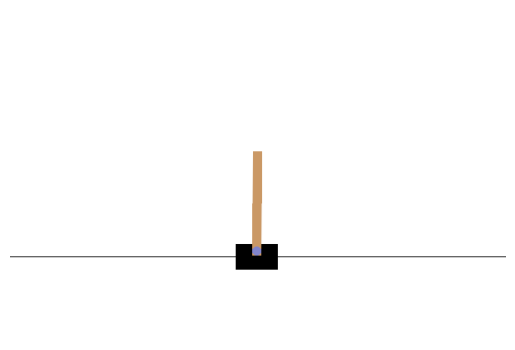

Left


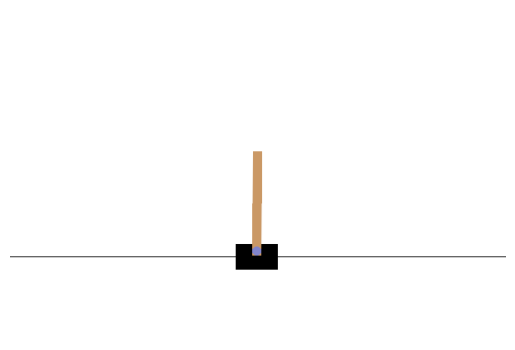

Left


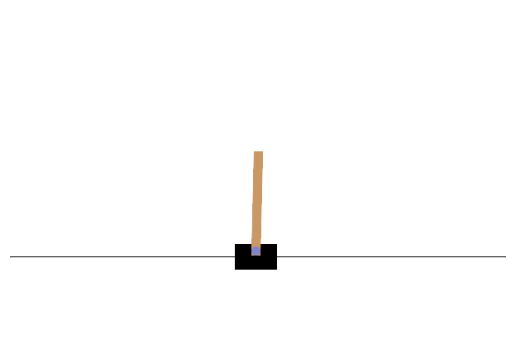

Left


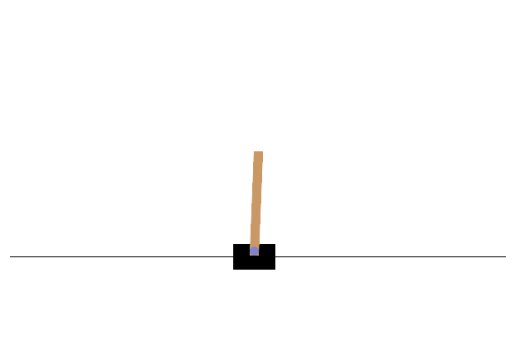

Left


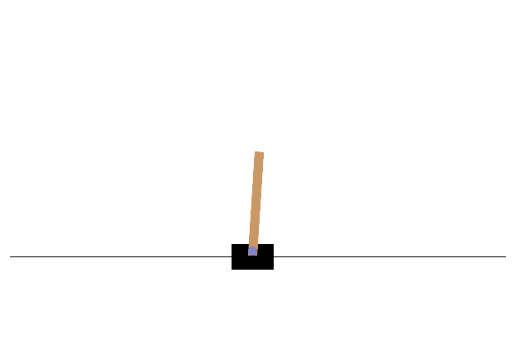

Left


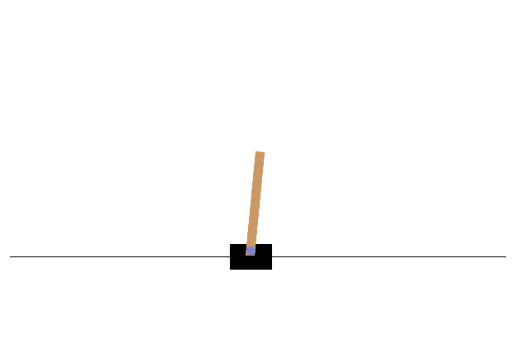

Left


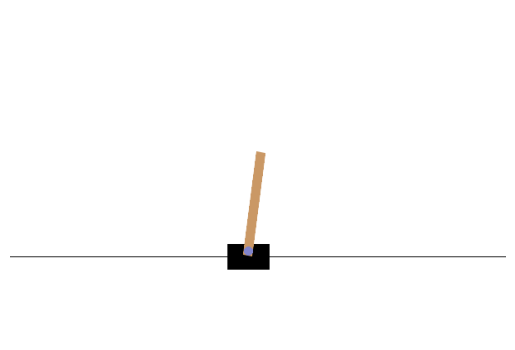

Left


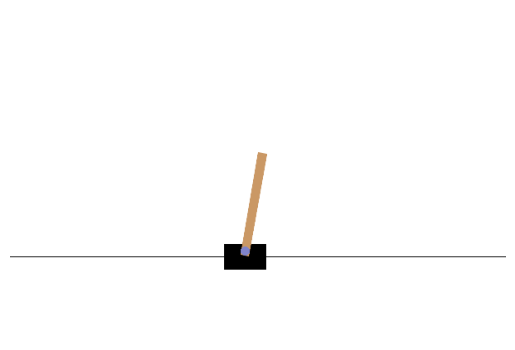

Left


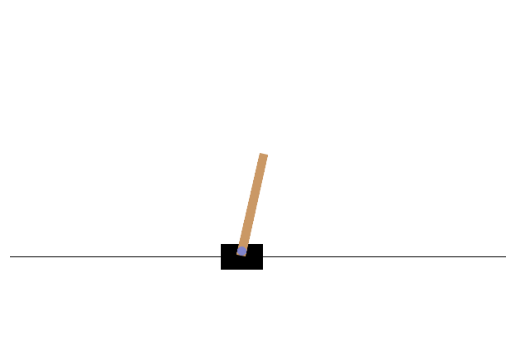

In [6]:
def choose_best_action_with_model(state, model, possible_actions):
    best_action = None
    best_reward = -float('inf')
    
    for action in possible_actions:
        action_tensor = torch.tensor([[action]], dtype=torch.float32)
        state_tensor = torch.tensor([state], dtype=torch.float32)
        
        next_state = model(state_tensor, action_tensor).detach().numpy().flatten()

        reward = 1 if abs(next_state[2]) < 0.2 else -1

        if reward > best_reward:
            best_reward = reward
            best_action = action
    
    return best_action

env = gym.make('CartPole-v1', new_step_api=True, render_mode="rgb_array")
state = env.reset()
done = False
while not done:
    action = choose_best_action_with_model(state, model, [0, 1])
    print("Left") if action == 0 else print("Right")
    state, reward, done, _, _ = env.step(action)
    pixels = env.render()
    image = Image.fromarray(np.array(pixels[0]))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

The result is not good, something wrong?